# TASK 1

In [374]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import filters, segmentation

In [375]:
# 1. Read the image
image = cv2.imread("test.png")

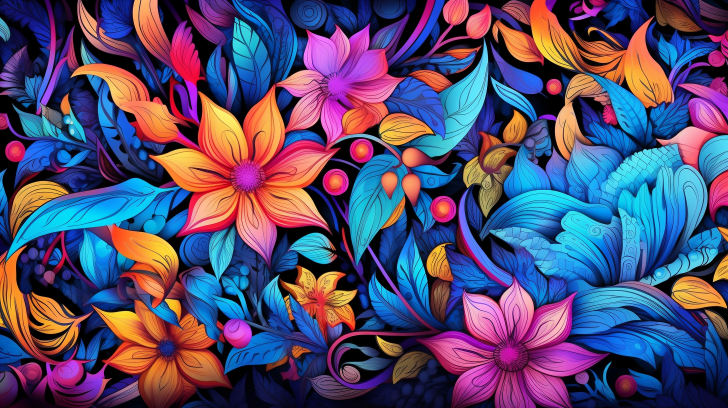

In [376]:
# 2. Display the image
image = cv2.resize(image, (728, 408))
cv2_imshow(image)


In [377]:
# 3. Extract image size
height, width, channels = image.shape
print(f"Image Size: Width={width}, Height={height}, Channels={channels}")

Image Size: Width=728, Height=408, Channels=3


In [378]:
# 4. Calculate total image pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

Total Pixels: 297024


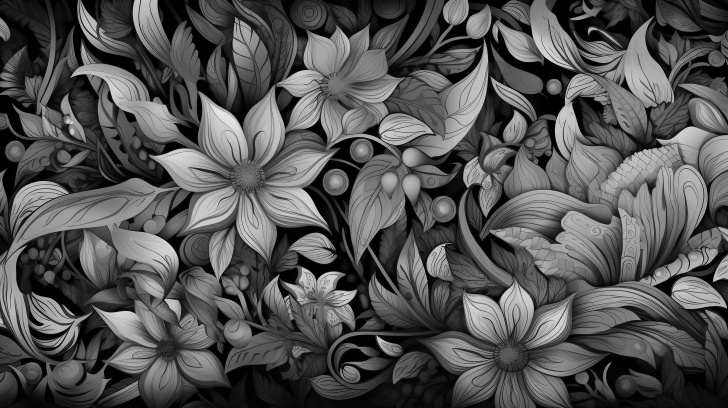

In [379]:
# 5. Convert RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)

# Display Grayscale Image
cv2_imshow(gray_image)


In [380]:
# 6. Convert Grayscale to Binary using threshold
threshold_value = 100
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)

True

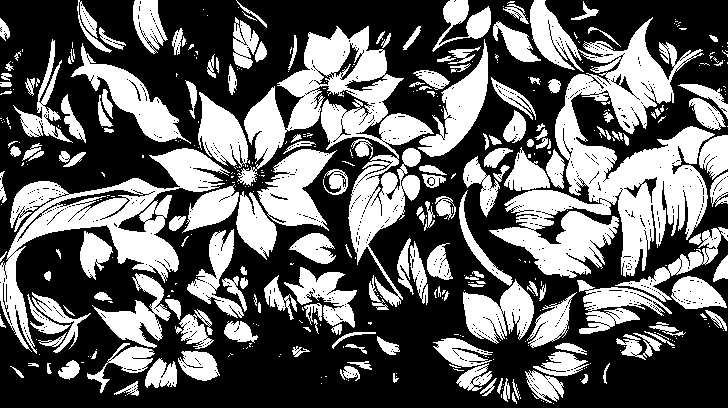

In [381]:
# Display Binary Image
cv2_imshow(binary_image)

In [382]:
# i. Count the black pixels in binary image
black_pixels = np.sum(binary_image == 0)
print(f"Black Pixel Area: {black_pixels}")
print(f"Image Size (Pixels): {total_pixels}")

Black Pixel Area: 180206
Image Size (Pixels): 297024


# TASK 2

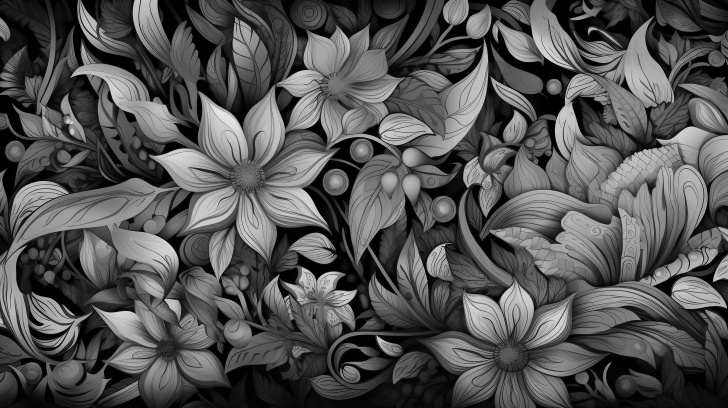

In [383]:
# 2. Display the image
cv2_imshow(gray_image)

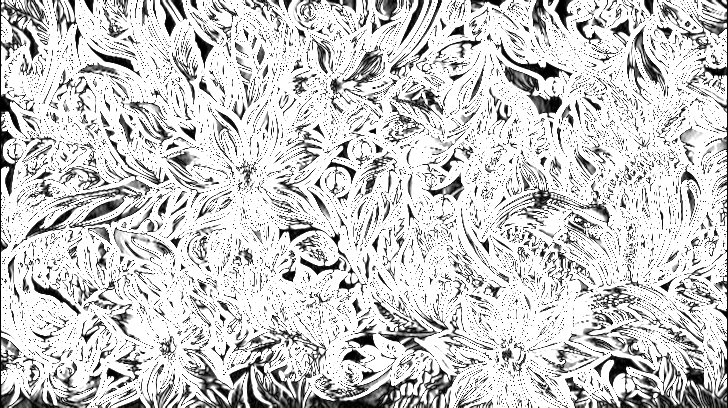

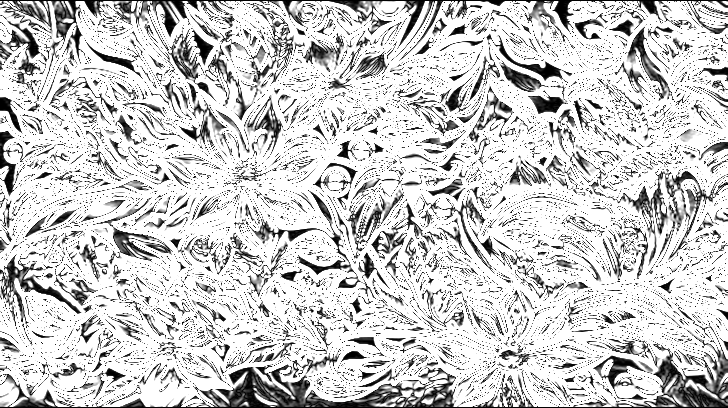

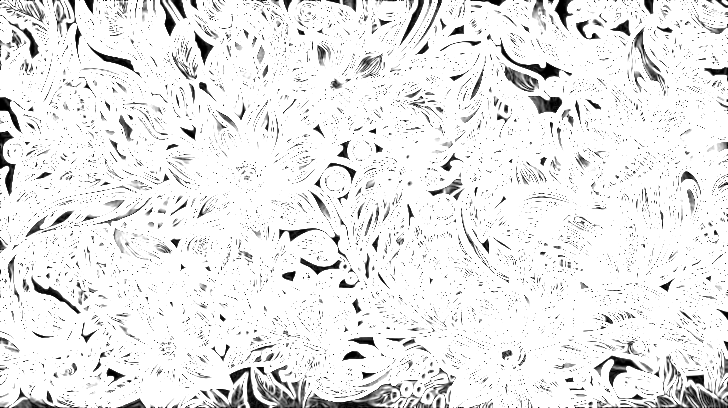

In [384]:
# Apply Sobel operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Convert to uint8 for display\
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Display the results
cv2_imshow( sobel_x)
print("\n")
cv2_imshow( sobel_y)
print("\n")
cv2_imshow(sobel_combined)

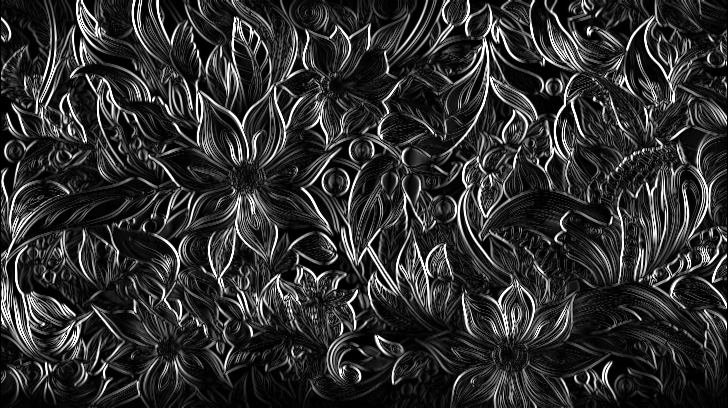

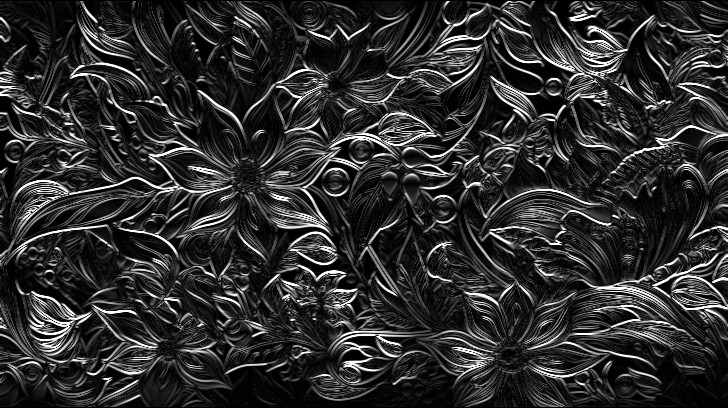

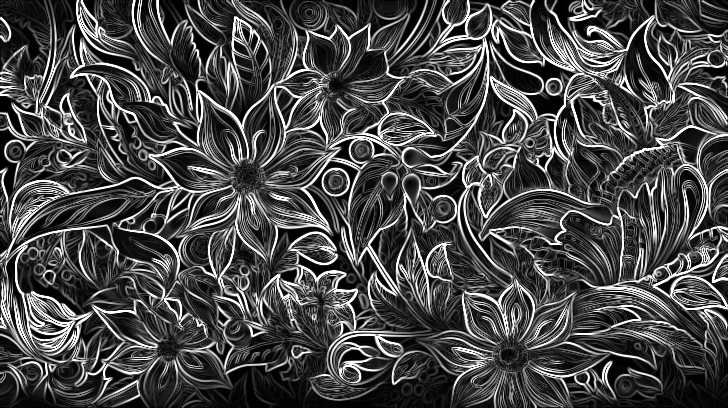

In [385]:
# Prewitt Operator
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply Prewitt kernels
prewitt_x = cv2.filter2D(gray_image, cv2.CV_64F, kernel_x)
prewitt_y = cv2.filter2D(gray_image, cv2.CV_64F, kernel_y)

# Compute magnitude
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)

# Convert to uint8 for display
prewitt_x_display = cv2.convertScaleAbs(prewitt_x)
prewitt_y_display = cv2.convertScaleAbs(prewitt_y)
prewitt_combined_display = cv2.convertScaleAbs(prewitt_combined)

# Display the results
cv2_imshow( prewitt_x_display)
print("\n")
cv2_imshow( prewitt_y_display)
print("\n")
cv2_imshow( prewitt_combined_display)

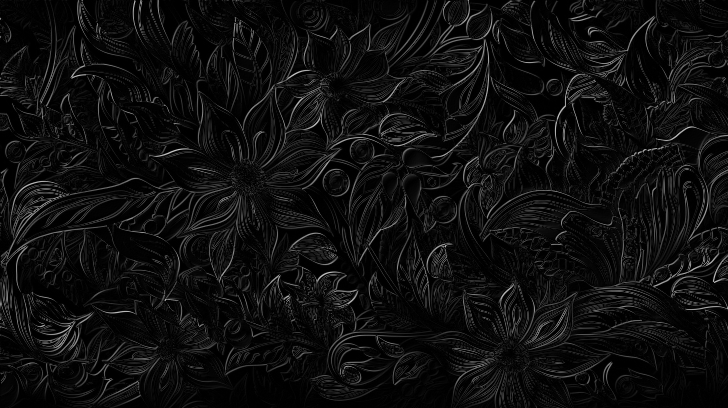

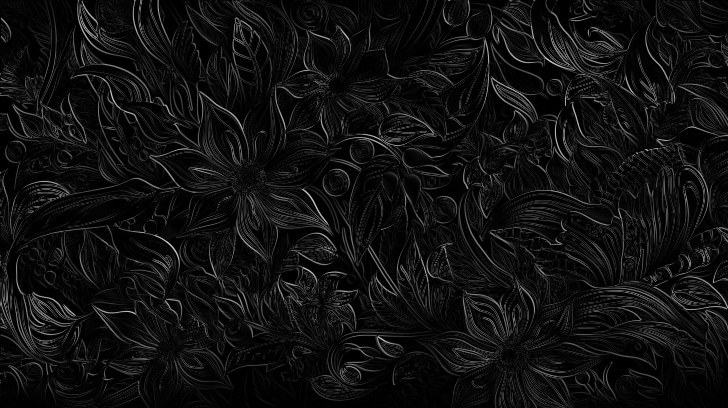

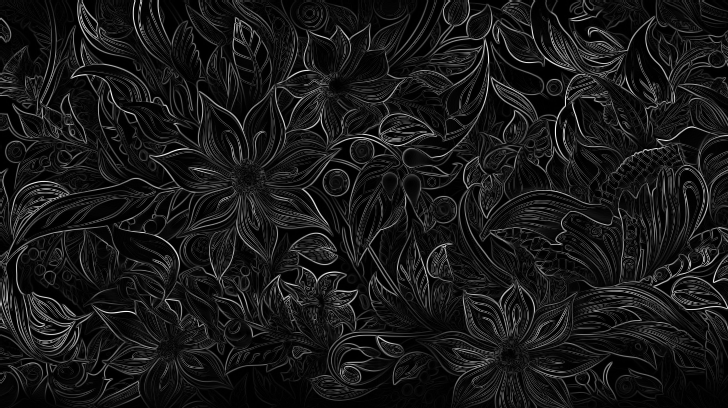

In [386]:
# Roberts Cross Operator
kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

image1 = gray_image.astype(np.float32)


roberts_x = cv2.filter2D(image1, -1, kernel_x)
roberts_y = cv2.filter2D(image1, -1, kernel_y)
roberts_combined = cv2.magnitude(roberts_x, roberts_y)

# Convert to uint8 for display
roberts_x = cv2.convertScaleAbs(roberts_x)
roberts_y = cv2.convertScaleAbs(roberts_y)
roberts_combined = cv2.convertScaleAbs(roberts_combined)

# Display the results
cv2_imshow( roberts_x)
print("\n")
cv2_imshow(roberts_y)
print("\n")
cv2_imshow( roberts_combined)

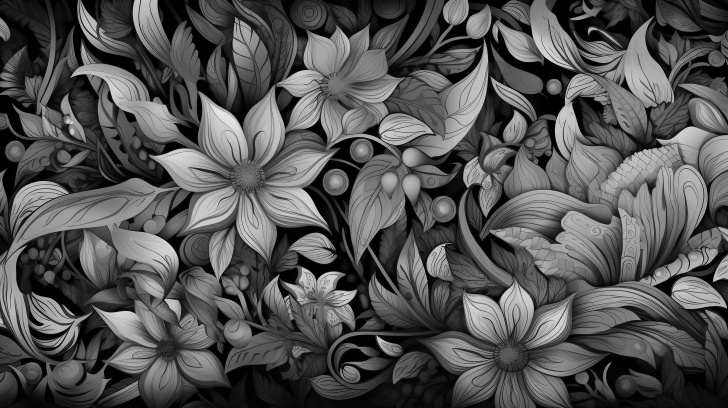

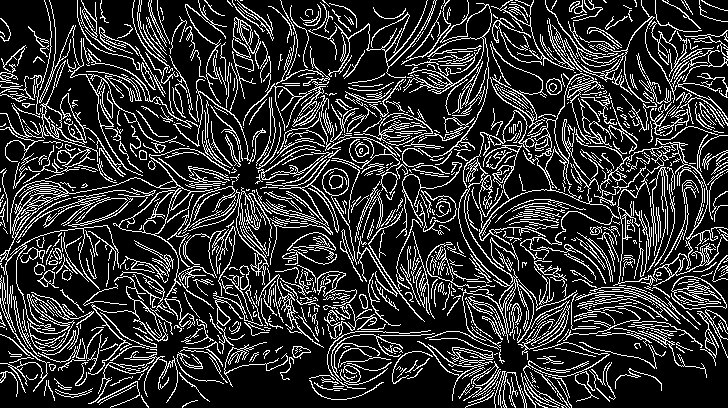

In [387]:
# Canny Edge Detector
edges = cv2.Canny(gray_image, 100, 200)

# Display the result
cv2_imshow(gray_image)
print("\n")
cv2_imshow(edges)

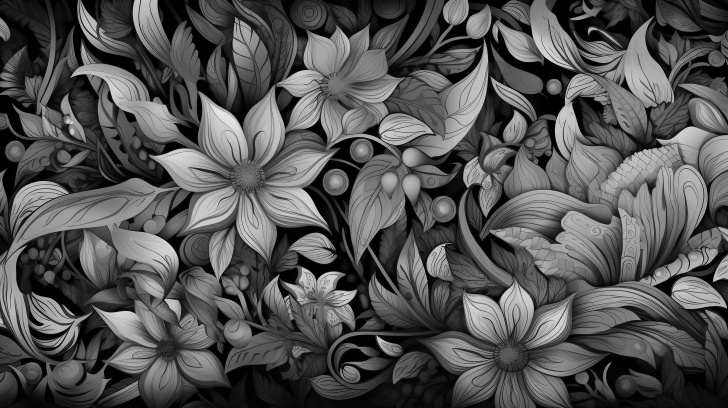

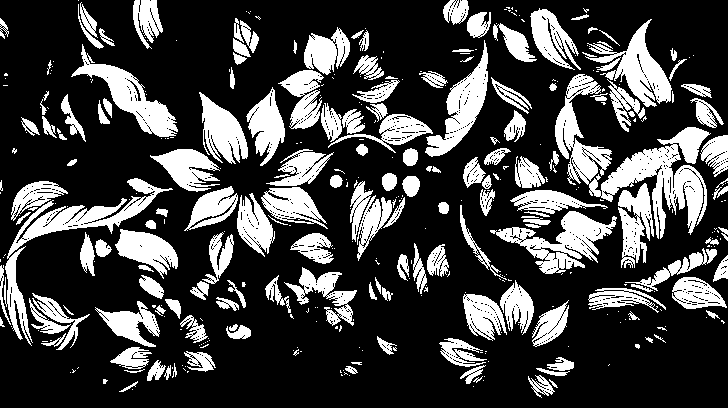

In [388]:
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

cv2_imshow( gray_image)
print("\n")
cv2_imshow( global_thresh)

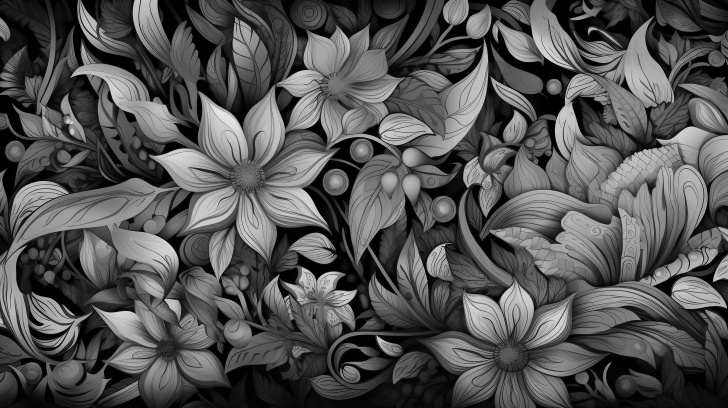

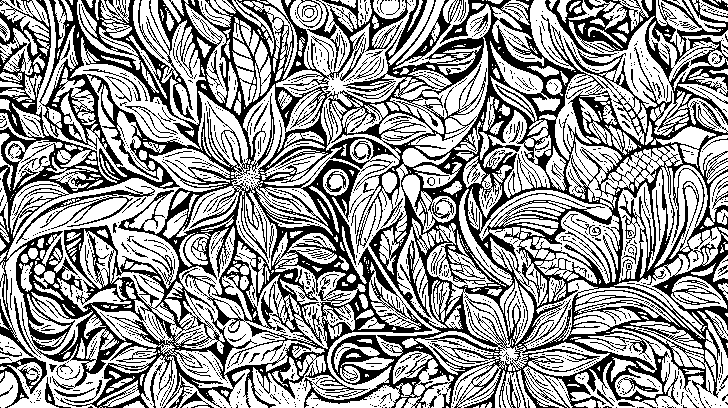

In [389]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2_imshow(gray_image)  # Show grayscale image
print("\n")
cv2_imshow(adaptive_thresh) # Show thresholded image

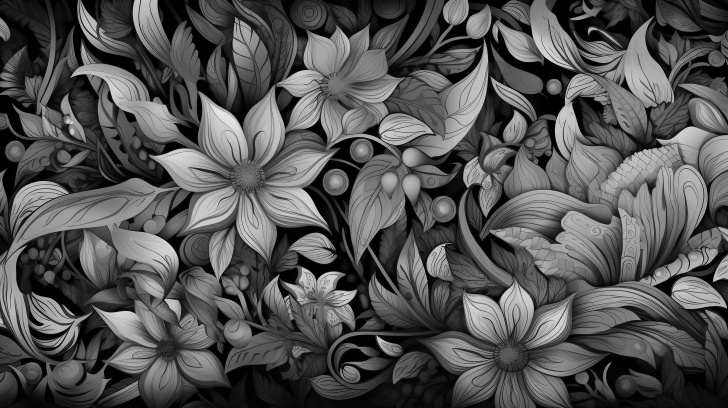

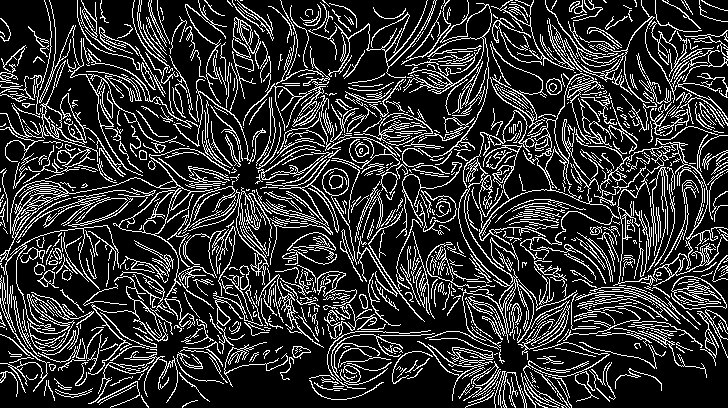

In [390]:
edges = cv2.Canny(gray_image, 100, 200)

cv2_imshow(gray_image)
print("\n")
cv2_imshow(edges)

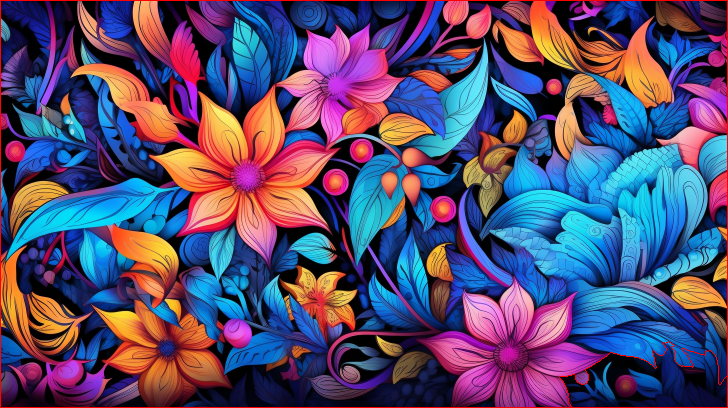

In [391]:
# Apply thresholding
_, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area using dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Distance transform to get sure foreground
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Ensure background is not 0
markers[unknown == 255] = 0  # Mark unknown region as 0

# Ensure markers are of type CV_32SC1
markers = np.int32(markers)

# Apply Watershed algorithm
markers = cv2.watershed(image, markers)

# Mark boundaries in red
image[markers == -1] = [0, 0, 255]

# Show results
cv2_imshow(image)  # Display final segmented image
